In [25]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
#importing the dataset
skin = pd.read_csv("./finaldataset.csv")

In [27]:
#shuffling the dataset
from sklearn.utils import shuffle
skin=shuffle(skin,random_state=0)

In [52]:
skin.head()

,Image,S. no,area,centroid,perimeter,B,D1,D2,A1,A2,f1,f2,f3,fr1,fr2,fr3,fr4,fr5,fr6,Melanoma
83,IMD159,83,155020,"[428, 249]",1425,1.04,439,293,2.44,2.00,0.293460,0.389358,0.317181,1.978568,2.409542,7.820871,29.369579,31.376673,27.444730,0
12,IMD018,12,100797,"[373, 266]",883,0.62,310,184,6.20,6.02,0.291768,0.390261,0.317971,0.686760,0.860795,3.269445,-16.716267,-5.632196,18.349184,0
33,IMD045,33,220568,"[374, 184]",5078,9.31,587,587,1.49,0.89,0.280297,0.394679,0.325025,1.987780,2.107871,2.797556,34.055686,28.042687,19.301479,0
113,IMD242,113,297255,"[384, 326]",7014,13.17,624,604,1.54,1.35,0.314488,0.396047,0.289465,2.752296,2.757996,4.113484,52.847930,58.311377,46.623395,1
171,IMD406,171,147434,"[440, 191]",5867,18.58,685,685,3.01,2.83,0.269283,0.400538,0.330179,0.813346,1.043672,1.705733,-12.139108,1.862071,13.399609,1


In [28]:
#dropping predictions, image names and centroid 
# assigning X to features
X = skin.drop(['Image','S. no','Melanoma','centroid'],axis=1)
#assigning y to predictions
y =skin['Melanoma']

In [29]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [48]:
#importing seaborn for plots
import seaborn as sns

In [63]:
#showing few features with their variations with images

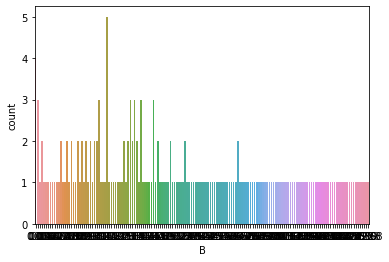

In [50]:
#B = (contour perimeter * contour perimeter)/4 * pi * contour area
sns.countplot(x = "B", data = skin)

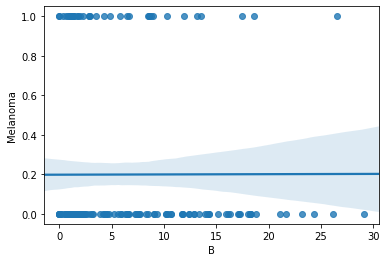

In [59]:
#effect of B on images of skin
sns.regplot(x = 'B', y = 'Melanoma', data = skin)

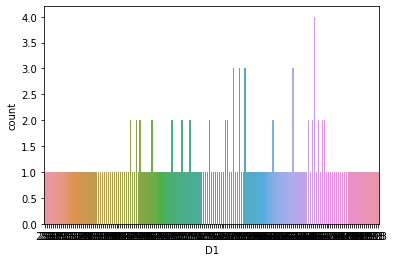

In [60]:
#D1 = max([nW, nH]) 
sns.countplot(x = "D1", data = skin)

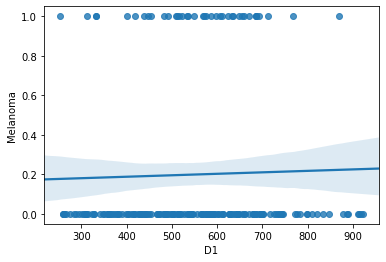

In [62]:
#effect of D on images of skin
sns.regplot(x = 'D1', y = 'Melanoma', data = skin)

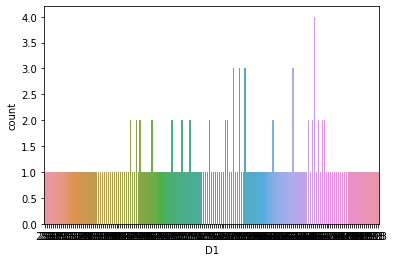

In [65]:
#A1 = float(h_asym) / contour_area
sns.countplot(x = "D1", data = skin)

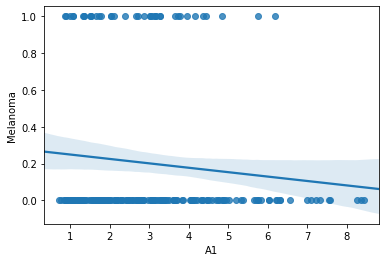

In [66]:
#effect of A1 on images of skin
sns.regplot(x = 'A1', y = 'Melanoma', data = skin)

In [30]:
#for balancing the skewed dataset
from imblearn.over_sampling import RandomOverSampler

In [31]:
#creating object
ros = RandomOverSampler(random_state=0)

In [32]:
#changed X and y value
X_resampled, y_resampled = ros.fit_resample(X, y)

In [33]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

In [34]:
#counting the classes (0 and 1)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 157), (1, 157)]


In [35]:
#importing the svc classifier
#Using rbf classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',random_state = 0)
svclassifier.fit(X_resampled, y_resampled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
#predicting the class(0 or 1) for X_test
y_pred = svclassifier.predict(X_test)

In [37]:
#using confusion matrix to find
#True positive, True negative, False positive, False negative
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[35,  9],
       [ 5, 10]], dtype=int64)

In [39]:
#resampling 
y_resampled

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
#X after applying feature scaling
X_resampled

array([[-0.55500813, -0.67341544, -0.63545585, ..., -0.43507018,
        -0.31749702, -0.03132065],
       [-0.06058398,  1.83623104,  1.79428058, ...,  0.08810779,
         0.09996424,  0.38127608],
       [-0.74180921, -0.83801574, -0.69471771, ..., -0.11588442,
        -0.05784574,  0.34365295],
       ...,
       [-0.6235117 , -0.41330633, -0.44987264, ..., -0.24452219,
        -0.27880429,  0.04613539],
       [-0.11995184, -0.63023327, -0.6728844 , ...,  0.31764121,
         0.30670808,  0.27630672],
       [-0.69574006,  0.92026088,  1.22037621, ..., -0.85181973,
        -0.90690607, -0.71175656]])

In [43]:
#getting F1 scores, accuracy, and confusion matrix to see how good model works..
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[35  9]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.53      0.67      0.59        15

    accuracy                           0.76        59
   macro avg       0.70      0.73      0.71        59
weighted avg       0.79      0.76      0.77        59

0.7627118644067796
